#**Introduction:**

- This document outlines the basic steps involved in the **Segmentation task.**
- It uses the **McDonalds** dataset for the task.

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Mount the drive for dataset file access


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load dataset

In [5]:
df = pd.read_csv('/content/drive/MyDrive/del - Fenny Labs/mcdonalds.csv')

### View data

In [6]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


### View Columns of the dataset

In [7]:
pd.Series(df.columns.tolist(), index=range(1, len(df.columns.tolist())+1), name="Columns in the McDonald's dataset")

,Columns in the McDonald's dataset
1,yummy
2,convenient
3,spicy
4,fattening
5,greasy
6,fast
7,cheap
8,tasty
9,expensive
10,healthy


### Number of data points

In [8]:
print("Number of data points : ",df.shape[0])

Number of data points :  1453


### Check data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


**- There are no NULL values in the data**

In [10]:
df.iloc[:, [0, 1, 3, 4]].describe()

,yummy,convenient,fattening,greasy
count,1453,1453,1453,1453
unique,2,2,2,2
top,Yes,Yes,Yes,Yes
freq,803,1319,1260,765


In [11]:
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


### Check for duplicate rows and remove if exists

In [12]:
df.duplicated().sum()

22

In [13]:
df.drop_duplicates(inplace=True, ignore_index=True)
df_original = df.copy()

In [14]:
df.duplicated().sum()

0

### Value counts - Unique values in each column

In [15]:
# Common function to display value_counts() for Categorical Column
# And Five point summary (min/max values) for Numerical variables

def summarize_column(col):
    if col.dtype == 'object' or pd.api.types.is_categorical_dtype(col):
        return col.value_counts()
    else:
        return col.describe()

In [16]:
# Function applied to multiple columns

summary = df.iloc[:,[0,1,2,3,4,5,6,7]].apply(summarize_column)
print(summary)

     yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty
No     645         133   1295        191     677   145    579    512
Yes    786        1298    136       1240     754  1286    852    919


In [17]:
# Function applied to multiple columns

summary = df.iloc[:,[8,9,10]].apply(summarize_column)
print(summary)

     expensive  healthy  disgusting
No         915     1144        1081
Yes        516      287         350


In [18]:
df.Gender.value_counts()

,count
Gender,
Female,772
Male,659


In [19]:
# Create bins for the Age column
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Create a new column for binned age
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Get the value counts of the binned age groups
df['age_group'].value_counts().reindex(labels)

,count
age_group,
0-20,44
20-40,547
40-60,617
60-80,223
80-100,0


In [20]:
df.Like.value_counts()

,count
Like,
+3,225
+2,180
0,168
+4,156
+1,152
I hate it!-5,150
I love it!+5,140
-3,73
-4,70


In [21]:
df.VisitFrequency.value_counts()

,count
VisitFrequency,
Once a month,427
Every three months,339
Once a year,252
Once a week,232
Never,128
More than once a week,53


**Note: The labels for "VisitFrequency"	and "Like" column are not in proper order. So lets reorder it.**

In [22]:
unique_levels = df.Like.unique()
pd.Series(unique_levels)

,0
0,-3
1,+2
2,+1
3,+4
4,I love it!+5
5,I hate it!-5
6,-2
7,+3
8,0
9,-4


In [23]:
# Reorder the levels as specified in the R code
reordered_levels = [unique_levels[i] for i in [4,3,7,1,2,8,10,6,0,9,5]]

# Display the value_counts() using the reordered labels
df.Like.value_counts().reindex(reordered_levels)

,count
Like,
I love it!+5,140
+4,156
+3,225
+2,180
+1,152
0,168
-1,58
-2,59
-3,73


**- Similar reordering can be done to "VisitFrequency" column**

#**EDA - Data Visulaization**

### Histogram for numerical variables

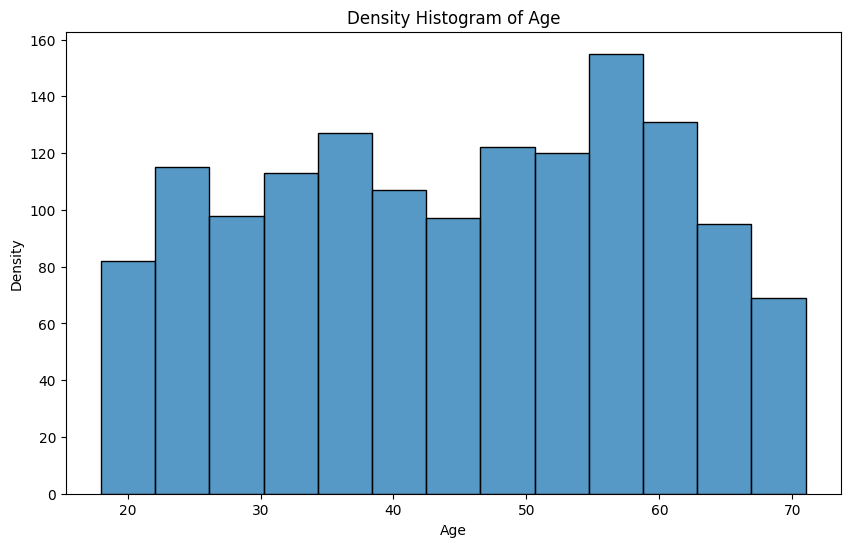

In [24]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Histogram of Age')

# Show the plot
plt.show()

**Histogram with defined bin size**

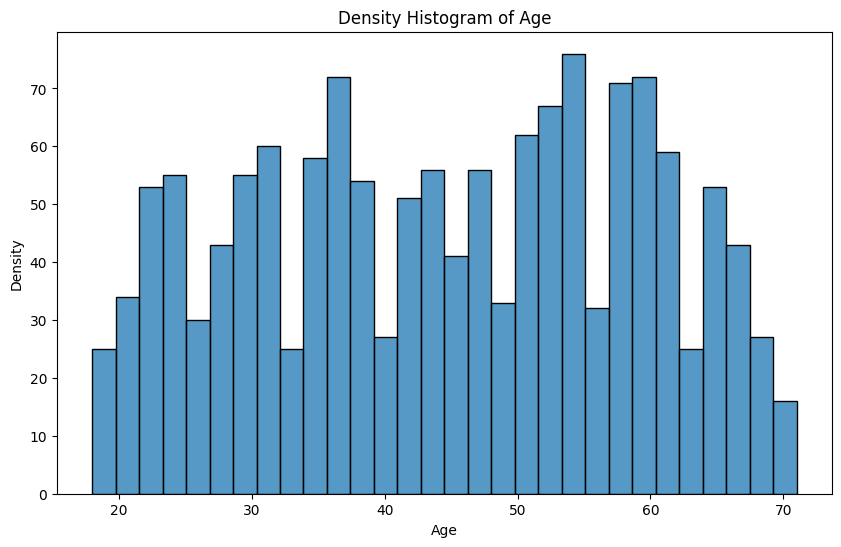

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Histogram of Age')

# Show the plot
plt.show()

**Using a countplot**

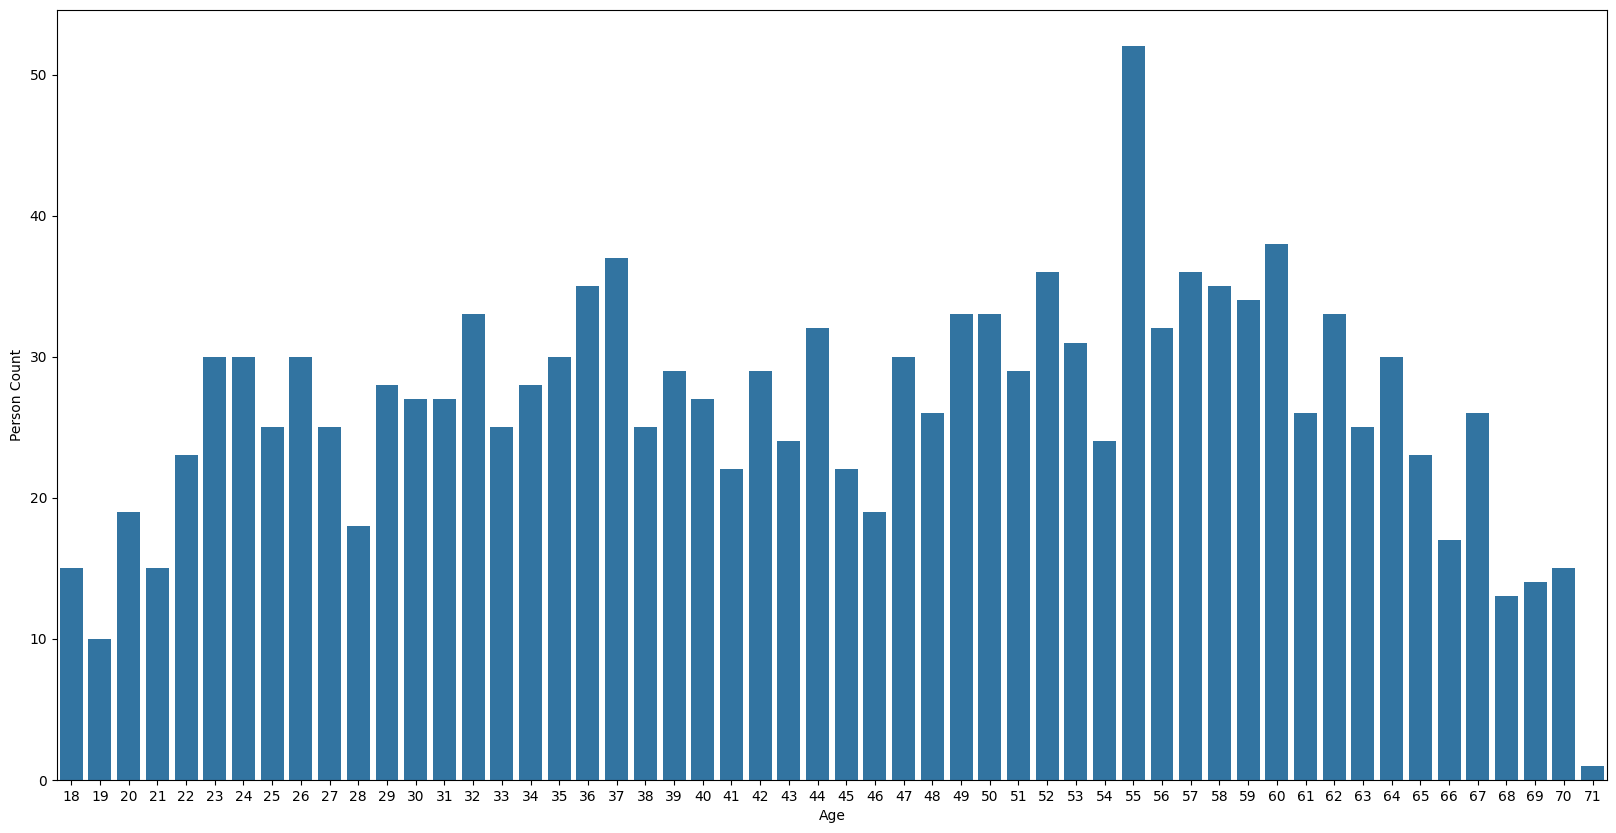

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Age", data = df)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

### Box plot

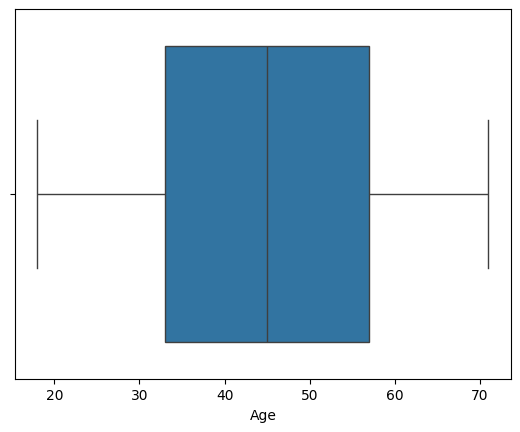

In [27]:
sns.boxplot(data=df, x='Age');

### **Dot plot**
**- To visualize which attributes of McDonald's are most appealing to people**

In [28]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'age_group'],
      dtype='object')

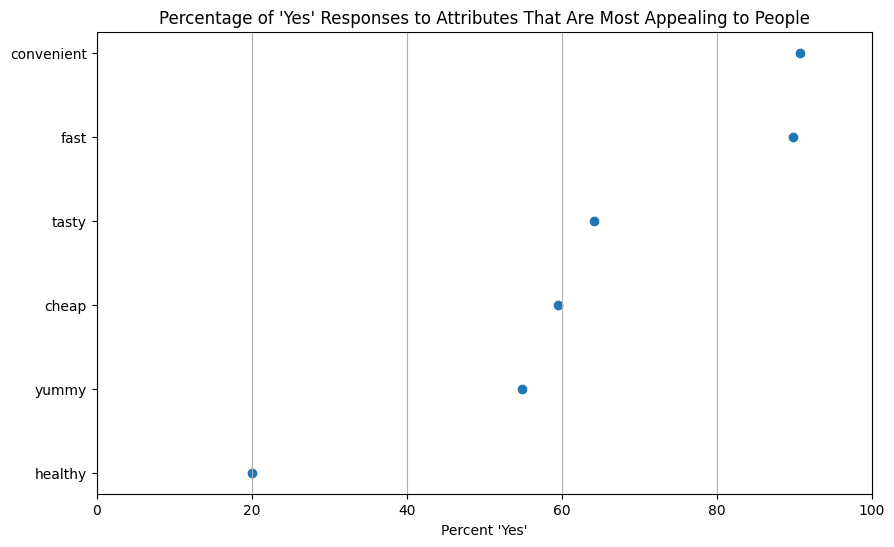

In [29]:
# List of attributes that should be most appealing to the people
good_attributes = ['yummy', 'convenient', 'fast', 'cheap', 'tasty', 'healthy']

#  Get the indexes of the specified columns as integers
indexes = [df.columns.get_loc(col) for col in good_attributes if col in df.columns]

yes_percentages = 100 * df.iloc[:,indexes].apply(lambda x: (x == 'Yes').mean(), axis=0)

# Sort the percentages
yes_sorted = yes_percentages.sort_values()

# Create a dot chart
plt.figure(figsize=(10, 6))
plt.scatter(yes_sorted, range(len(yes_sorted)), marker='o')
plt.yticks(range(len(yes_sorted)), yes_sorted.index)
plt.xlabel("Percent 'Yes'")
plt.xlim(0, 100)
plt.title("Percentage of 'Yes' Responses to Attributes That Are Most Appealing to People")
plt.grid(axis='x')
plt.show()

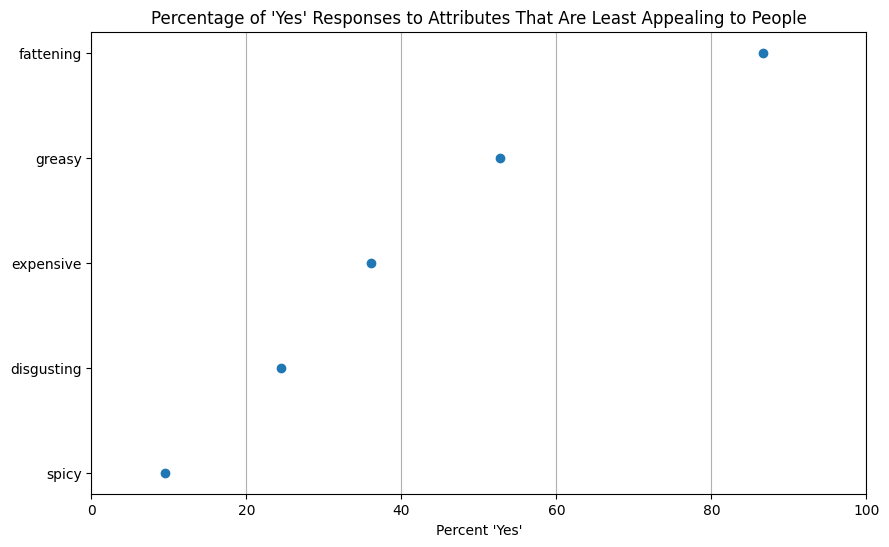

In [30]:
# List of attributes that should be least appealing to the people
bad_attributes = ['spicy', 'fattening', 'greasy', 'expensive',  'disgusting']

#  Get the indexes of the specified columns as integers
indexes = [df.columns.get_loc(col) for col in bad_attributes]

yes_percentages = 100 * df.iloc[:,indexes].apply(lambda x: (x == 'Yes').mean(), axis=0)

# Sort the percentages
yes_sorted = yes_percentages.sort_values()

# Create a dot chart
plt.figure(figsize=(10, 6))
plt.scatter(yes_sorted, range(len(yes_sorted)), marker='o')
plt.yticks(range(len(yes_sorted)), yes_sorted.index)
plt.xlabel("Percent 'Yes'")
plt.xlim(0, 100)
plt.title("Percentage of 'Yes' Responses to Attributes That Are Least Appealing to People")
plt.grid(axis='x')
plt.show()

# Pre-processing


## Categorical Variables

### Merge categories with lower values
- This is required for the "Like" column.
- Categories below "0" rating have low values, so they can be merged together
- Two new categories (-1:-2 and -3:-4) would be created for 4 existing categories

In [31]:
# Define a new category to merge categories of "Like" column
merge_dict = {
    '-1': '-1:-2',
    '-2': '-1:-2',
    '-3': '-3:-4',
    '-4': '-3:-4'
}

# Use replace to merge categories
df['Like'] = df['Like'].replace(merge_dict)


In [32]:
# Reorder the labels in "Like" column to view frequncy counts in proper order
unique_levels = df.Like.unique()
reordered_levels = [unique_levels[i] for i in [4,3,1,2,8,6,0,5]]

# Display the value_counts() using the reordered labels
df.Like.value_counts().reindex(reordered_levels)

,count
Like,
I love it!+5,140
+4,156
+2,180
+1,152
0,168
-1:-2,117
-3:-4,143
I hate it!-5,150


### Convert categorical columns to numeric columns
- value "1" for "Yes" and "0" for "No"
- There are 11 categorical columns from index 0 to 10.

In [33]:
df.iloc[:, 0:11] = (df.iloc[:, 0:11] == "Yes").astype(int)

## Numeric variables

### Data Scaling using Standardization
**- Note: If data has outliers, it is better to use Median and IQR for standardization instead of Mean and Std. dev.**  

- Only "Age" column is a numeric column in this dataset. It has no outliers. So we can use the StandardScaler class.


In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))

# PCA

**Issue with PCA for Segmentation**

The issue arises when only a subset of components is selected, which alters the space from which segments are derived. This can lead to a loss of important information and potentially misleading results.

**Practical Approach:**

The suggested approach is to use PCA for exploratory purposes to identify and possibly remove redundant variables from the dataset. This maintains the integrity of the original data while still achieving dimensionality reduction.

- So, let’s determine whether there are any redundant variables.

- Let's convert all object columns to numeric.
- Convert categorical columns to numeric.

In [35]:
d_copy = df.copy()
# df = d_copy.copy()

In [36]:
# Drop Age_group column which was created only for data visualization
df.drop(columns=['age_group'],inplace=True)

# Convert "Gender" to numeric
df['Gender'] = df['Gender'].astype('category').cat.codes

# Define the category orders for columns "Like" and "VisitFrequency"

# "Like" column
new_categories = ['I hate it!-5', '-3:-4', '-1:-2', '0','+1', '+2', '+3', '+4','I love it!+5']
df['Like'] = df['Like'].astype('category').cat.set_categories(new_categories)
# df['Like'].astype('category').cat.categories           # Displays the category orders
df['Like'] = df['Like'].astype('category').cat.codes     # Change the categories to numeric codes


# "VisitFrequency" column
new_categories = [ 'Never', 'Once a year', 'Every three months', 'Once a month', 'Once a week', 'More than once a week']
df['VisitFrequency'] = df['VisitFrequency'].astype('category').cat.set_categories(new_categories)
df['VisitFrequency'] = df['VisitFrequency'].astype('category').cat.codes     # Change the categories to numeric codes

# Convert all object columns to numeric
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('int8')

**IMPORTANT- Data must be scaled before apply PCA**
- Binary columns need not be scaled
- Age column has already been scaled to standard format (mean 0 and unit variance)

In [37]:
columns_to_scale = ['Like', 'VisitFrequency']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

- Apply PCA

In [38]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)

PCA()

- See the "explained variance" by each principle component

In [39]:
pca.explained_variance_

array([2.14320993, 0.93478534, 0.43660883, 0.34160208, 0.23751832,
       0.21705184, 0.15881342, 0.15102911, 0.11171316, 0.09675287,
       0.07994809, 0.0751459 , 0.07046553, 0.06248483, 0.05514356])

- Observe the cumulative explained variance

In [40]:
pca.explained_variance_.cumsum()

array([2.14320993, 3.07799527, 3.5146041 , 3.85620617, 4.0937245 ,
       4.31077634, 4.46958975, 4.62061886, 4.73233202, 4.82908489,
       4.90903298, 4.98417888, 5.05464441, 5.11712924, 5.1722728 ])

- Get loadings for each component

In [41]:
# Get loadings (components)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Identify highly correlated variables (e.g., high absolute loadings on the same principal component)
threshold = 0.8  # Set a threshold for high correlation
for pc in loadings_df.columns:
    correlated_vars = loadings_df.index[abs(loadings_df[pc]) > threshold]
    if len(correlated_vars) > 1:
        print(f"Highly correlated variables on {pc}: {list(correlated_vars)}")

Highly correlated variables on PC1: ['Like', 'VisitFrequency']


- This suggests that we can remove one of the columns, either 'Like' or 'VisitFrequency.'"

Lets check collinearity of thee 2 columns

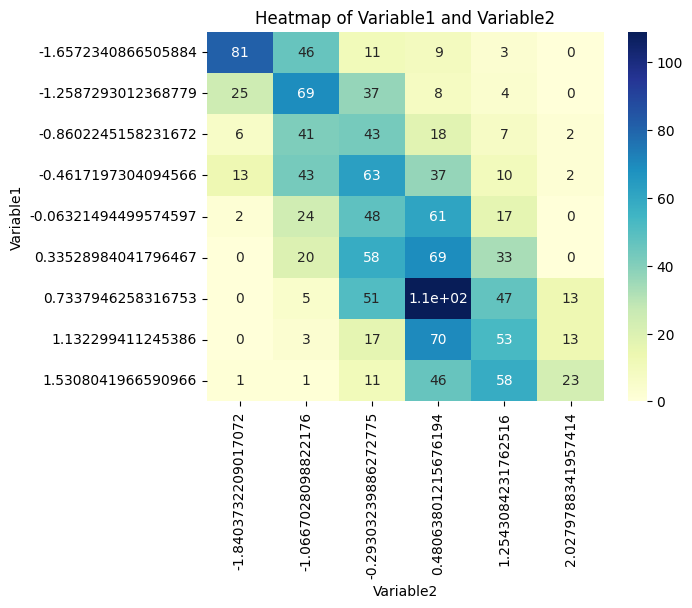

In [42]:
crosstab = pd.crosstab(df['Like'], df['VisitFrequency'])
sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Variable1 and Variable2')
plt.xlabel('Variable2')
plt.ylabel('Variable1')
plt.show()

# Step 5 - Extracting Segments

### Distance-Based Methods

##### 	Distance Measures

**Note:**
- The **pdist()** function from the **SciPy** library is used to calculate pairwise distances.
- Unlike the daisy() function in R, which can handle numeric, ordinal, nominal, and binary variables, pdist() primarily handles only numeric data.
- Therefore, data should be properly converted to numeric values before using pdist().

In [43]:
# Common function - To show only lower triangle of a matrix

def ShowLowerTriangle(distance_matrix):
  # Create a mask for the upper triangle
  mask = np.triu(np.ones_like(distance_matrix, dtype=bool))

  # Create a DataFrame and set upper triangle to NaN
  lower_triangle_df = pd.DataFrame(distance_matrix)
  lower_triangle_df.where(~mask, other=np.nan, inplace=True)

  # Display the DataFrame with empty cells instead of NaN
  def format_empty(val):
      return '' if pd.isna(val) else val

  formatted_df = lower_triangle_df.map(format_empty)

  return formatted_df

In [44]:
from scipy.spatial.distance import pdist, squareform

# Compute the distance for first 5 customer reviews

# Calculate pairwise Euclidean distances
euclidean_distances = pdist(df.iloc[0:5,:], metric='euclidean')  # 'euclidean' is the default metric    # 'cityblock' is the Manhattan distance

# Convert to a square form
distance_matrix = np.round(squareform(euclidean_distances),2)

print("\nEuclidean Distance Matrix:")
print(ShowLowerTriangle(distance_matrix))



Euclidean Distance Matrix:
      0     1     2     3 4
0                          
1  2.46                    
2  2.54  2.18              
3  3.66  2.58  3.17        
4   2.8  2.37  2.57  2.87  


- Let's look at the first 5 reviews to check that the calculated distances are noticeable.




In [45]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-1.258729,1.151424,-0.293032,0
1,1,1,0,1,1,1,1,1,1,0,0,0.335290,0.446923,-0.293032,0
2,0,1,1,1,1,1,0,1,1,1,0,-0.063215,1.221874,-0.293032,0
3,1,1,0,1,1,1,1,1,0,0,1,1.132299,1.715025,1.254308,0
4,0,1,0,1,1,1,1,0,0,1,0,0.335290,0.306022,0.480638,1


**Observations:**
- Review 3 is quite different from other reviews. The distance is maximum w.r.t other reviews ( > 3.1). This is the only review which says the product is rather "Disgusting".
- Review 3 is closer to review 1. Distance is 2.58. The responses to various attributes like "yummy", "convenient", "spicy" etc. are same for both the reviews.

##### Hierarchical Methods

### Model-Based Methods

In [46]:
# Mean of every column
np.round(df.mean(),2)

,0
yummy,0.55
convenient,0.91
spicy,0.10
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


- This gives the general review points by most of the customers.
- e.g. mean of "fast" attribute is 0.9, It means that most of the people think that the service is fast.
- e.g  mean of "healthy" attribute is 0.2. It means that most of the people think that the food is not healthy.
- It gives the general tendancy of the customers.

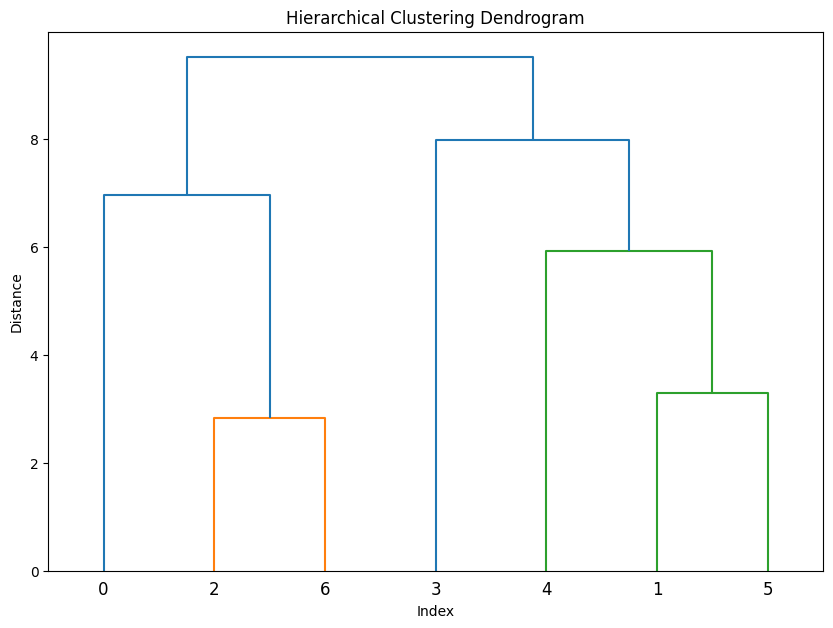

In [47]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Let's do hierarchical clustering for first 7 customers

# Calculate pairwise Manhattan distances
dist_matrix = pdist(df.iloc[0:7,:], metric='cityblock')  # 'cityblock' is equivalent to Manhattan distance

# Perform hierarchical clustering using complete linkage
df_hcl = linkage(dist_matrix, method='complete')

plt.figure(figsize=(10, 7))
dendrogram(df_hcl, labels=df.iloc[0:7,:].index.astype(str))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

- As mentioned earlier, when calculating the distance between data points using the pdist() method, Customer 3 was added to a cluster at the end due to its notably different feedback, with "disgusting" marked as "Yes" along with other values.

- The dendrogram can be used to form as many clusters as desired using the fcluster() function.

In [48]:
# Cut the tree at height 4
clusters = fcluster(df_hcl, t=4, criterion='distance')

# Create a frequency table of the clusters
cluster_table = pd.Series(clusters).value_counts()

print(cluster_table)

3    2
1    2
2    1
5    1
4    1
Name: count, dtype: int64


- We mentioned a distance of 4 while cutting the dendrogram to form segments. As shown in the dendrogram, the fcluster() function has formed 5 clusters.
- The 1st and 3rd clusters each contain 2 customer reviews, while the other 3 clusters contain only 1 customer review each.

In [49]:
pd.DataFrame({"DataPoint":range(0,7),"Cluster":clusters})

,DataPoint,Cluster
0,0,2
1,1,3
2,2,1
3,3,5
4,4,4
5,5,3
6,6,1


- From both the table above and the dendrogram, we can see that customers 1 and 5 are in cluster 3, while customers 2 and 6 are in cluster 1.

**Visualizing Characteristics of Each Cluster**
- This can be achieved by calculating the mean of all attributes for each cluster, and then presenting the data in a bar chart format.

<ipython-input-50-c08412c1a3bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_clusters['Cluster'] = clusters


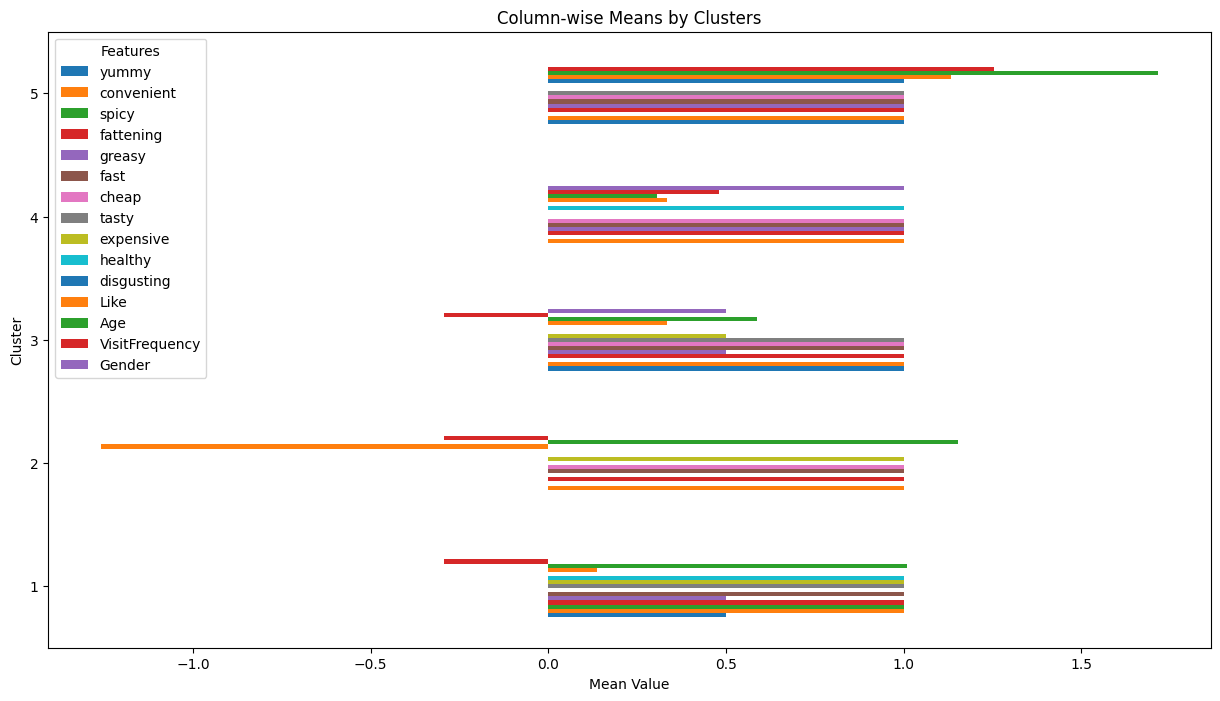

In [50]:
# Extract first 7 records from the dataset which is used for cluster analysis
d_clusters = df.iloc[:7,:]

# Add cluster labels to the DataFrame
d_clusters['Cluster'] = clusters

# Calculate the means for each cluster
cluster_means = d_clusters.groupby('Cluster').mean()

# Sort cluster means if necessary (by index or values)
cluster_means = cluster_means.sort_index()  # Sort by cluster index

# Define a color palette with unique colors
# colors = plt.cm.tab10(np.linspace(0, 1, d_clusters.shape[1]))

# Plotting the means
cluster_means.plot(kind='barh', figsize=(15, 8)) #, color=colors
plt.title('Column-wise Means by Clusters')
plt.ylabel('Cluster')
plt.xlabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Features')
plt.show()

- A different color map needs to be applied to extract more information from this graph.

### Partitioning Methods

- Computationally efficient, as it only computes distances between each data point and the centroids of the segments at each step.
- To find the optimal solution, it is critical to specify the correct number of segments and initialize the centroids properly. Thus, experimentation is required to determine the optimal solution.

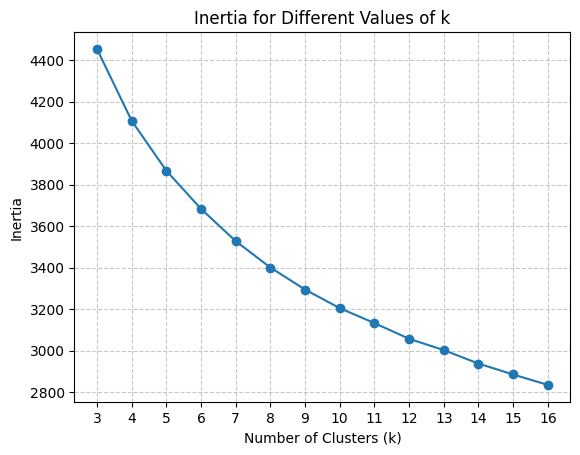

In [51]:
from sklearn.cluster import KMeans

# Function to find clusters for various K values with different centroid seeds
def step_cclust(data, k_range, nrep):
    results = {}

    for k in k_range:
        best_inertia = float('inf')
        best_model = None

        for _ in range(nrep):
            model = KMeans(n_clusters=k, n_init=10)  # n_init controls the number of time the k-means algorithm will be run with different centroid seeds
            model.fit(data)

            # Store the model if it has the best inertia (sum of squared distances to nearest cluster center)
            if model.inertia_ < best_inertia:
                best_inertia = model.inertia_
                best_model = model

        results[k] = best_model

    return results

# Define the range of k and number of repetitions
k_range = range(3, 17)  # k = 2 to 8
nrep = 5

# Run the stepcclust equivalent
cluster_model_results = step_cclust(df, k_range, nrep)

# Optionally, plot inertia for each k
inertia_values = [model.inertia_ for model in cluster_model_results.values()]
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia for Different Values of k')
plt.xticks(k_range)

# Add horizontal and vertical grid lines
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()


**Note:**

- The sum of distances of all observations to their centroids for various K
values can be seen in the graph above. The lower the distance, the better the segmentation solution.
- The optimal number of segments is identified where the last **distinct** drop occurs. Therefore, 5 to 7 clusters seem to be the optimal number of segments.
- Calculations for each k value (number of segments) can be done in parallel, allowing for **parallel processing** to be utilized here.

# **Step 6: Profiling Segments**
- After segmenting the data, it is essential to analyze the segments.
- Segment analysis involves understanding the characteristics of each segment.
- One way to analyze these characteristics is to identify how much each segment differs from the overall data.
- **Segmentation profile plots** help visualize this information using bar charts.

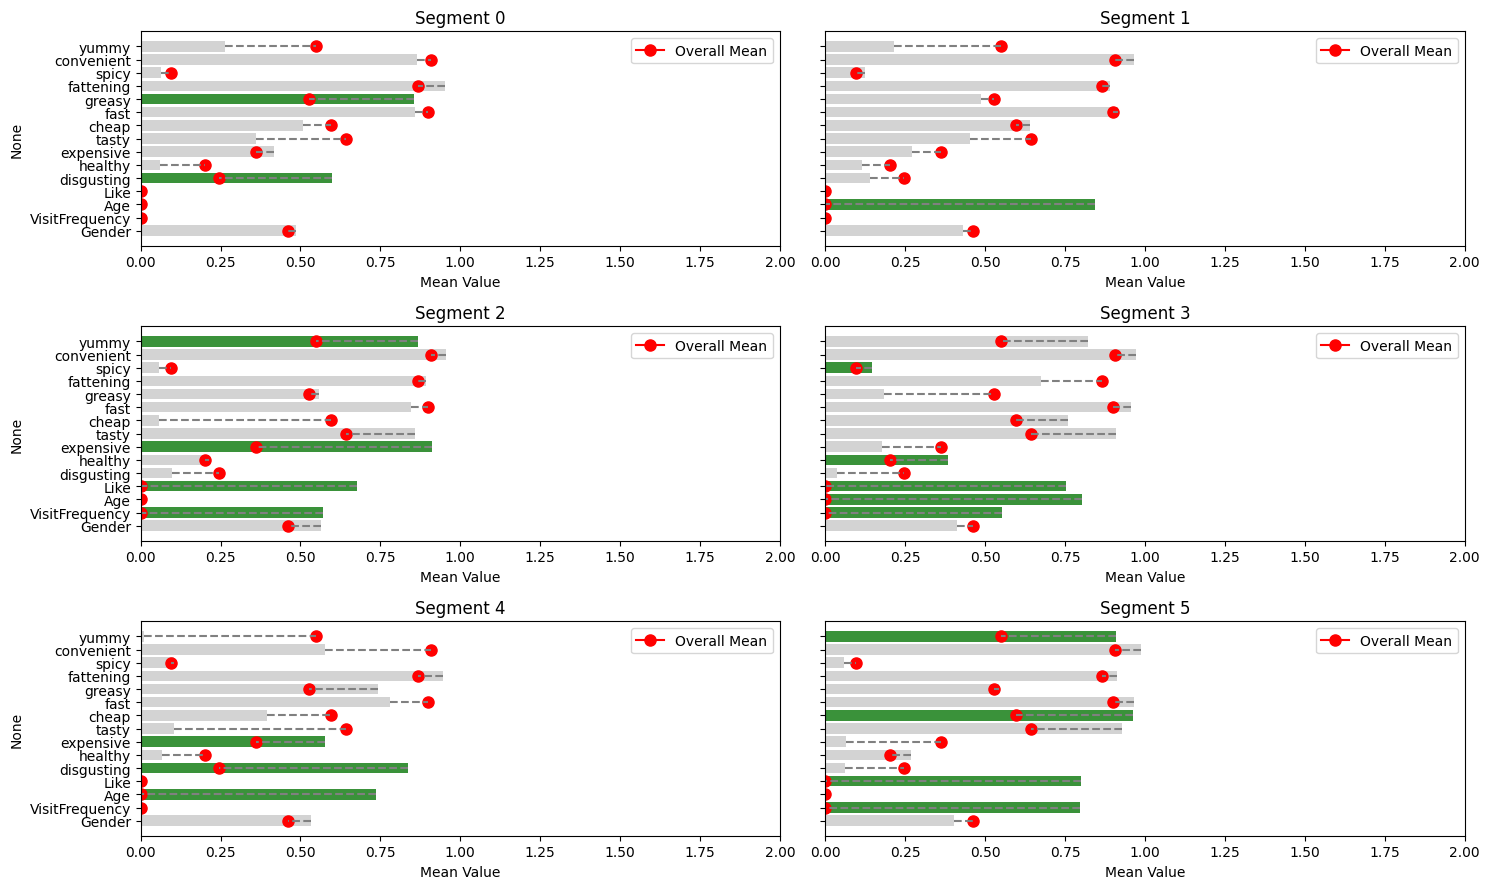

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Let us use the cluster data obtained from the KMeans model with 6 segments.
clustered_df = df.copy()
clustered_df['Cluster'] = cluster_model_results[6].labels_

# Calculate the mean for each feature by segment
mean_values = clustered_df.groupby('Cluster').mean().reset_index()

# Calculate the overall mean for each feature
overall_means = clustered_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender']].mean()

# Create subplots for each segment
segments = mean_values['Cluster']
num_segments = len(segments)

# Create a figure with subplots in 2 columns
fig, axes = plt.subplots(num_segments // 2, 2, figsize=(15, 3 * (num_segments // 2)), sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier indexing

for ax, segment in zip(axes, segments):
    # Filter data for the current segment
    segment_data = mean_values[mean_values['Cluster'] == segment]

    # Prepare a list for bar colors
    bar_colors = []

    for i, feature in enumerate(segment_data.columns[1:]):
        value = segment_data.iloc[0, i + 1]  # Get the bar value

        # Determine bar color based on conditions
        if value > overall_means[feature]:  # Greater than overall mean
            if value > overall_means[feature] * 1.5:
                bar_colors.append('#2ca02c')  # Darker green for > 1.5 times overall mean
            else:
                bar_colors.append('#d3d3d3')  # Lighter gray for > overall mean but <= 1.5 times
        elif value < overall_means[feature]:  # Less than overall mean
            if value < overall_means[feature] * 0.75:
                bar_colors.append('#d3d3d3')  # Lighter gray for < 75% of overall mean
            else:
                bar_colors.append('#d3d3d3')  # Lighter gray for < overall mean but >= 75%
        else:
            bar_colors.append('#d3d3d3')  # Default lighter gray

    # Plot the mean values for each feature as horizontal bars with conditional colors
    sns.barplot(y=segment_data.columns[1:], x=segment_data.iloc[0, 1:], ax=ax,
                palette=bar_colors, orient='h')

    # Add markers for the overall mean and draw lines
    for i, feature in enumerate(segment_data.columns[1:]):
        # Plot overall mean marker
        ax.plot(overall_means[feature], i, marker='o', color='red', markersize=8, label='Overall Mean' if i == 0 else "")

        # Draw a line from the bar to the overall mean
        ax.plot([segment_data.iloc[0, i + 1], overall_means[feature]], [i, i], color='gray', linestyle='--')

    ax.set_title(f'Segment {segment}')
    ax.set_xlabel('Mean Value')
    # ax.set_ylabel('Features')
    ax.set_xlim(0, 2)     # ax.set_xlim(0, mean_values.iloc[:, 1:].max().max() + 5)
    ax.legend()

plt.tight_layout()
plt.show()


We can gain the following insights from the graph:
- Segment 1 includes all individuals in the older age group.
- Segment 0 contains customers who like the product and visit the shop frequnetly.
- Segment 4 consists of people who think that the product is expensive and do not like it.

# Step 7: Describing Segments

- Segments can be further analyzed using descriptor variable.

- Let us segment the data based on few features.
- Let us use "Gender" as a descriptor variable for further analysis.

In [53]:
segment_feature_list = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency']
df_seg_fetures = df[segment_feature_list]

model = KMeans(n_clusters=6, n_init=10)
model.fit(df_seg_fetures)

clustered_df_seg_fetures = df_original.copy()
clustered_df_seg_fetures['Cluster'] = model.labels_

### Single Categorical Discriptor Variable

- A mosaic plot is an effective way to compare segments based on categorical data.
- The Statsmodels library provides an easy way to create mosaic plots.

In [54]:
!pip install statsmodels

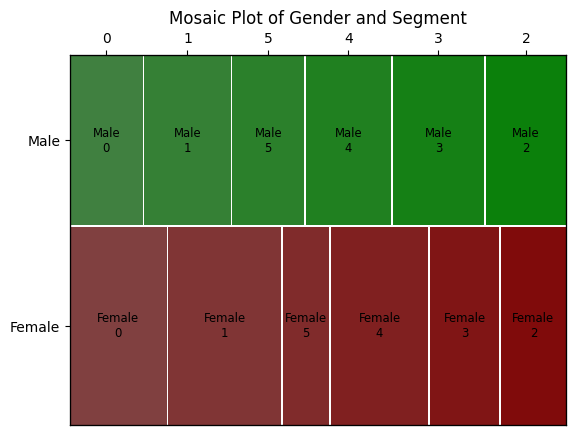

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Specify the order of segments
segment_order = [0,1,2,3,4,5]

# Create a mosaic plot
mosaic(clustered_df_seg_fetures, ['Gender', 'Cluster'], title='Mosaic Plot of Gender and Segment', horizontal=False)

# Show the plot
plt.show()


In [56]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(clustered_df_seg_fetures['Cluster'], clustered_df_seg_fetures['Gender'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
# print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
# print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(expected)

P-value: 7.882607575535992e-05


p-value less than 0.05 shows that the gender distribution is quite different across the segments.

### Multiple Descriptor Variable

In [78]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Build data
X = df[['Age','Gender']]
y = clustered_df_seg_fetures['Cluster']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

# Apply all models
dTree = DecisionTreeClassifier(max_depth= 5)   #,criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

# Evaluate the model performance
dTree.score(X_test,y_test)

0.23693379790940766

- The descriptors have a low score in representing the segments.